# Tarea 1 (Solucion)

In [1]:
import pandas as pd

## Problema 1: Clasificacion de Hongos

Los hongos son organismos vivos pertenecientes al Reino Fungi. De manera similar a los seres humanos, los hongos sin iuncapaes de realizar la fotosintesis y se alimentan de hidratos de carbono ya elaborados [1](https://kataix.umag.cl/sib-aysen/hongusto/meet-fungi/). 

| Agaricus | Lepiota   |
|---|---|
| <img src="./figures/agaricus.jpg" width="200" height="200">| <img src="./figures/lepiota.jpg" width="210" height="300"> |

Algunos de estos Hongos son comestibles, como el *Agaricus bisporus* (champiñón común). Sin embargo, dependiendo de ciertas caracteristicas como el color, tamaño y láminas, podemos identificar generos venenosos.

El siguiente conjunto de datos incluye informacion descriptiva de 23 especies de hongos con branquias de la familia Agaricus y Lepiota. Cada especie se identifica como comestible (`e`) o venenosa (`p`)

| atributo | valores   |
|---|---|
|Cap-shape | {x, b, s, f, k, c} |
|Cap-surface | {s, y, f, g} |
|Cap-color |{n, y, w, g, e, p, b, u, c, r} |
|Bruises | {t, f} |
|Odor | {p, a, l, n, f, c, y, s, m} |
|Gill-attachment | {f, a, d, n} |
|Gill-spacing | {c, w, d} |
|Gill-size | {n, b} |
|Gill-color | {k, n, g, p, w, h, u, e, b, r, y, o} |
|Stalk-shape | {e, t} |
|Stalk-root | {e, c, b, r, u, z} |
|Stalk-surface-above-ring | {s, f, k, y} |
|Stalk-surface-below-ring | {s, f, y, k} |
|Stalk-color-above-ring | {w, g, p, n, b, e, o, c, y} |
|Stalk-color-below-ring | {w, p, g, b, n, e, y, o, c} |
|Veil-type | {p, u} |
|Veil-color | {w, n, o, y} |
|Ring-number | {o, t, n} |
|Ring-type | {p, e, l, f, n, c, s, z} |
|Spore-print-color | {k, n, u, h, w, r, o, y, b} |
|Population | {s, n, a, v, y, c} |
|Habitat | {u, g, m, d, p, w, l} |
|Class | {p, e} |

In [2]:
dataframe = pd.read_csv('./data/mushroom.dat')
dataframe.sample(3)

,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,Stalk-shape,...,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat,Class
5713,x,y,e,f,y,f,c,n,b,t,...,w,p,p,w,o,e,w,v,p,p
6174,f,NaN,e,f,f,f,c,n,b,t,...,w,p,p,w,o,e,w,v,p,p
1299,f,s,w,f,n,f,w,b,n,t,...,w,w,p,w,o,e,n,a,g,e


#### 1.1 Grafique la distribucion de clases 

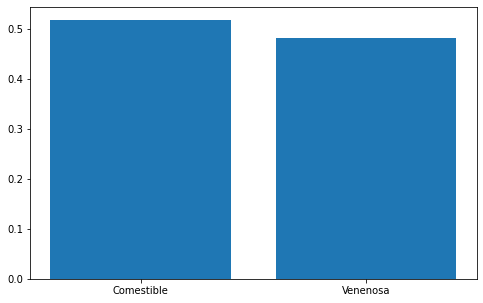

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
labels_dict = dataframe['Class'].value_counts(normalize=True)
plt.bar(range(labels_dict.shape[0]), labels_dict.values)
plt.xticks(range(labels_dict.shape[0]), ['Comestible', 'Venenosa'])
plt.show()

#### 1.2 Identifique valores faltantes.

In [4]:
import numpy as np
dataframe.isna().any()

Cap-shape                    True
 Cap-surface                 True
 Cap-color                   True
 Bruises                     True
 Odor                        True
 Gill-attachment             True
 Gill-spacing                True
 Gill-size                   True
 Gill-color                  True
 Stalk-shape                 True
 Stalk-root                  True
 Stalk-surface-above-ring    True
 Stalk-surface-below-ring    True
 Stalk-color-above-ring      True
 Stalk-color-below-ring      True
 Veil-type                   True
 Veil-color                  True
 Ring-number                 True
 Ring-type                   True
 Spore-print-color           True
 Population                  True
 Habitat                     True
Class                        True
dtype: bool

In [5]:
dataframe = dataframe.fillna('?') ## reemplazamos los valores missing por "?"

#### 1.3 Preprocese los datos para entrenar un algoritmo de aprendizaje automatico

In [6]:
input_dims = []
for col in dataframe.columns:
    y_onehot = pd.get_dummies(dataframe[col])
    y_onehot.columns = [col+'_'+c for c in y_onehot.columns]
    input_dims.append(y_onehot)
    
matrix = pd.concat(input_dims, 1)
X = matrix.iloc[:, :-2]
y = matrix.iloc[:, -2:]

#### 1.4 Divida el conjunto de entrenamiento

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, \
y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### 1.5 Entrene el algoritmo

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1234)
clf = clf.fit(X_train, y_train)

#### 1.5 Valide el algoritmo

In [10]:
from sklearn.metrics import precision_recall_fscore_support
y_pred = clf.predict(X_train)
prec, recall, f1, _ = precision_recall_fscore_support(y_train, y_pred, average='macro')
print('[Train] precision: {:.3f} recall: {} F1: {:.3f}'.format(prec, recall, f1))

y_pred = clf.predict(X_test)
prec, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print('[Test]  precision: {:.3f} recall: {:.3f} F1: {:.3f}'.format(prec, recall, f1))

[Train] precision: 1.000 recall: 1.0 F1: 1.000
[Test]  precision: 0.999 recall: 1.000 F1: 0.999


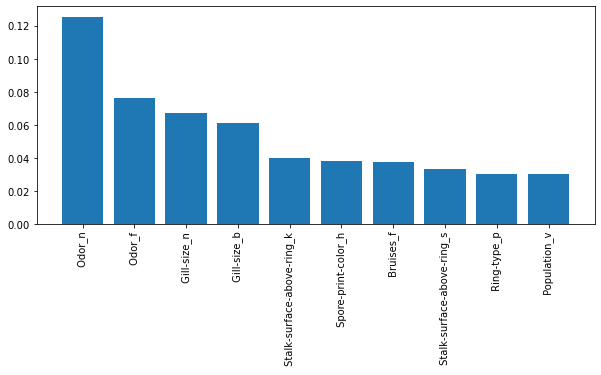

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,4))
x = range(len(clf.feature_importances_))
indices = np.argsort(clf.feature_importances_)

importance = clf.feature_importances_[indices][::-1]
attrib_name = X.columns[indices][::-1]

N = 10
plt.bar(x[:N], importance[:N])
plt.xticks(x[:N], attrib_name[:N], rotation=90)
plt.show()

#### 1.4 Concluya los resultados obtenidos

Se aprecia un sobreajuste en el entrenamiento i.e., 100% de F1 en entrenamiento y muy alto en test. Esto se puede deber a que las clases no varian mucho entre si, por lo tanto, los conjuntos son similares. Al ver el `feature importance` podemos ver una importancia significativa del atributo `Odor_n`(~8% de diferencia con la segunda mayoria) el cual representa el olor. Respecto de los otros atributos podemos ver importancias similares y menores al 10%. En otras palabras, durante el proceso discriminativo, la correlacion entre estos atributos es importante para separar clases.

## Problema 2: Prediciendo la demanda de taxis en NYC

En este problema, construiremos un modelo de regresion para predecir el numero de texis solicitados en la ciudad de Nueva York. Estos modelos suelen ser utiles, por ejemplo, para monitorear el traficio en la ciudad.

Los datos para este problema se encuentran en el archivo `nyc_taxi.csv`. La primera columna indica la hora del dia en minutos, mientras que la segunda columna indica la cantidad de taxis que estan recogiendo pasajeros en ese momento.

Se necesita un modelo que reciba la hora en minutos como predictor y prediga la demanda promedio de texis para ese momento del dia. Los modelos deben ser ajustados en el conjunto de entrenamiento y evaluados sobre el conjunto de test. Ademas, la metrica de evaluacion debe ser R2.

#### 2.1 Cargue los datos y describa la distribucion de los atributos

In [12]:
data = pd.read_csv('./data/nyc_taxi.csv')
data.sample(2)

,TimeMin,PickupCount
930,139.0,66.0
783,55.0,68.0


#### 2.2 Separe el conjunto de entrenamiento 

In [13]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

train_data.head()

,TimeMin,PickupCount
807,1206.0,30.0
700,1388.0,22.0
299,1083.0,46.0
542,18.0,25.0
1029,538.0,18.0


#### 2.3 Grafique el conjunto de entrenamiento utilizando un scatter plot 

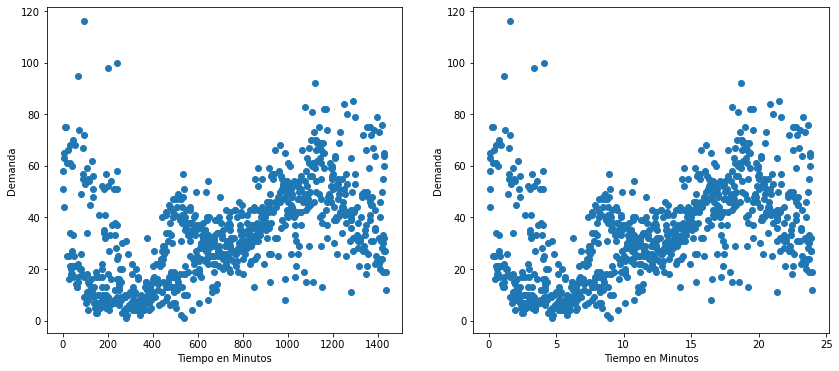

In [14]:
# Your code here
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
axes[0].scatter(train_data['TimeMin'], train_data['PickupCount'])
axes[0].set_xlabel('Tiempo en Minutos')
axes[0].set_ylabel('Demanda')

# Hours might be a more readable format of displaying the x-axis; apply a scale transformation
axes[1].scatter(train_data['TimeMin']/60, train_data['PickupCount']);
axes[1].set_xlabel('Tiempo en Minutos');
axes[1].set_ylabel('Demanda');

#### 2.4 Brevemente explique el patron de comportamiento de los datos a lo largo del dia

Desde los datos podemos ver un comportamiento sinusoidal, el cual puede estar relacionado con el ritmo de vida en NYC. En primer lugar vemos que entre las 00.00 y 5.00 am hay un descenso en el numero de personas que solicito un taxi. Principalmente, esto puede deberse al horario donde los pubs permanecen abiertos. Luego desde las 5.00 am en adelante la gente comienza su dia laboral y por ende la demanda aumenta hasta completar el ciclo.  

#### 2.5 En el grafico deberia ver un agujero entre los minutos 500 y 550 donde la demanda es aproximadamente 20-30. Explique el fenomeno

Este comportamiento puede deberse al efecto del fin de semana. Usualmente, la gente entre las 8 y 9 de la manana permanece en casa durante este periodo.

 #### 2.6 Entrene un modelo de regresion 

Se puede ver un comportamiento sinusoidal, lo cual sugiere un podelo no lineal. Para ellos utilizaremos una regresion polinomial con regualizacion Lasso

In [15]:
X_train = train_data.sort_values('TimeMin')['TimeMin'].values
y_train = train_data.sort_values('TimeMin')['PickupCount'].values

X_test = test_data.sort_values('TimeMin')['TimeMin'].values
y_test = test_data.sort_values('TimeMin')['PickupCount'].values

Creamos la matriz de diseno

In [16]:
from sklearn.preprocessing import PolynomialFeatures

polyfeat = PolynomialFeatures(degree=4)
polyfeat = polyfeat.fit(X_train[:,None])

D_train = polyfeat.transform(X_train[:,None]) 
D_test = polyfeat.transform(X_test[:,None]) 

Y finalmente, entrenamos el modelo

In [17]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, max_iter=10e5)
lasso.fit(D_train, y_train)

lasso.coef_

array([ 0.00000000e+00, -2.07772824e-01,  4.34807511e-04, -2.78616839e-07,
        5.14375466e-11])

#### 2.7 Reporte y explique el valor de R2

In [18]:
from sklearn.metrics import r2_score

In [19]:
y_pred = lasso.predict(D_test)

print('R2: {:.2f}'.format(r2_score(y_test, y_pred)))

R2: 0.37


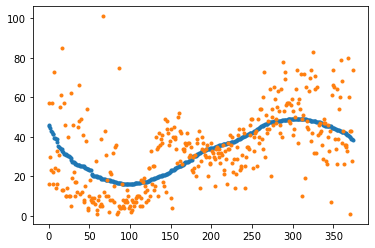

In [20]:
plt.figure()
plt.plot(y_pred, '.')
plt.plot(y_test, '.')

#### 2.8 Que significa un R2 = 0? y si fuese negativo?

- `R2 == 0`: signfica que nuestro modelo es equivalente a utilizar la media
- `R2 < 0`: El modelo es peor que utilizar la media 